In [8]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import sedov, sod_shock_tube_1d
from teyssier import riemann
from teyssier.sedov import sedovana

Sod Shock Tube

In [9]:
# compute exact solution
xana = (np.arange(1024) + 0.5) / 1024
wana = np.zeros([3, 1024])
for i in range(0, np.size(xana)):
    s = (xana[i] - 0.5) / 0.245
    d, v, p = riemann.exact_solution(s, [1, 0, 1], [0.125, 0, 0.1])
    wana[:, i] = [d, v, p]

Step #67 @ t=2.45e-01 | dt=1.37e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
Step #67 @ t=2.45e-01 | dt=1.08e-03 | min(rho)=1.25e-01, min(P)=9.97e-02 | (done)                   
Step #67 @ t=2.45e-01 | dt=1.63e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
Step #67 @ t=2.45e-01 | dt=1.06e-03 | min(rho)=1.25e-01, min(P)=9.99e-02 | (done)                   
Step #67 @ t=2.45e-01 | dt=1.52e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
Step #67 @ t=2.45e-01 | dt=1.33e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   


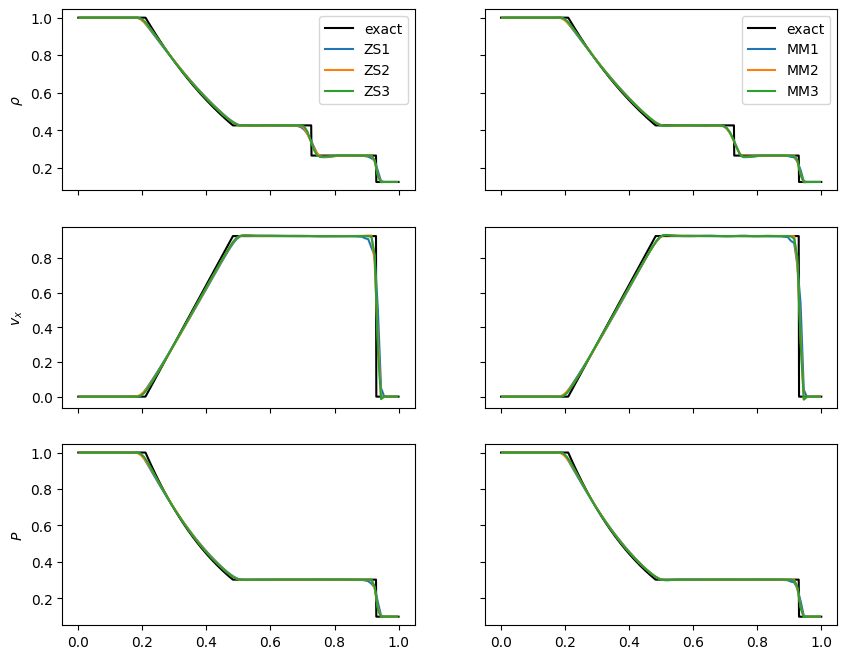

In [10]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey="row", figsize=(10, 8))

axs[0, 0].set_ylabel(r"$\rho$")
axs[1, 0].set_ylabel(r"$v_x$")
axs[2, 0].set_ylabel(r"$P$")

axs[0, 0].plot(xana, wana[0, :], label="exact", color="k")
axs[0, 1].plot(xana, wana[0, :], label="exact", color="k")
axs[1, 0].plot(xana, wana[1, :], label="exact", color="k")
axs[1, 1].plot(xana, wana[1, :], label="exact", color="k")
axs[2, 0].plot(xana, wana[2, :], label="exact", color="k")
axs[2, 1].plot(xana, wana[2, :], label="exact", color="k")

N = 100

cmap = plt.get_cmap("tab10")


def color(x):
    return cmap(x - 1)


for p in [1, 2, 3]:
    simZS = EulerSolver(
        ic=sod_shock_tube_1d,
        bcx="free",
        nx=N,
        p=p,
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        ZS=True,
        SED=True,
        PAD={"rho": (0, None), "P": (0, None)},
    )

    simMOOD = EulerSolver(
        ic=sod_shock_tube_1d,
        bcx="free",
        nx=N,
        p=p,
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        MOOD=True,
        cascade="muscl",
        max_MOOD_iters=1,
        MUSCL_limiter="moncen",
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-7,
        SED=True,
        PAD={"rho": (0, None), "P": (0, None)},
    )

    simZS.run(0.245)
    simMOOD.run(0.245)

    plot_1d_slice(simZS, axs[0, 0], "rho", label=f"ZS{p}", color=color(p))
    plot_1d_slice(simZS, axs[1, 0], "vx", label=f"ZS{p}", color=color(p))
    plot_1d_slice(simZS, axs[2, 0], "P", label=f"ZS{p}", color=color(p))

    plot_1d_slice(simMOOD, axs[0, 1], "rho", label=f"MM{p}", color=color(p))
    plot_1d_slice(simMOOD, axs[1, 1], "vx", label=f"MM{p}", color=color(p))
    plot_1d_slice(simMOOD, axs[2, 1], "P", label=f"MM{p}", color=color(p))

axs[0, 0].legend()
axs[0, 1].legend()

Sedov Blast

chi0=np.float64(0.97306051566207)
Step #69 @ t=8.00e-01 | dt=5.42e-04 | min(rho)=6.89e-02, min(P)=1.00e-05 | (done)                   
Step #68 @ t=8.00e-01 | dt=1.19e-02 | min(rho)=6.95e-02, min(P)=1.00e-05 | (done)                   
Step #69 @ t=8.00e-01 | dt=7.61e-03 | min(rho)=6.96e-02, min(P)=-5.02e-04 | (done)                  
Step #68 @ t=8.00e-01 | dt=9.86e-03 | min(rho)=7.05e-02, min(P)=-5.77e-04 | (done)                  
Step #71 @ t=8.00e-01 | dt=8.04e-04 | min(rho)=6.71e-02, min(P)=-1.43e-05 | (done)                  
Step #68 @ t=8.00e-01 | dt=1.00e-02 | min(rho)=7.04e-02, min(P)=-9.08e-06 | (done)                  
Step #69 @ t=8.00e-01 | dt=7.30e-04 | min(rho)=6.91e-02, min(P)=1.00e-05 | (done)                   
Step #68 @ t=8.00e-01 | dt=1.19e-02 | min(rho)=7.04e-02, min(P)=1.00e-05 | (done)                   
Step #69 @ t=8.00e-01 | dt=2.15e-03 | min(rho)=6.98e-02, min(P)=1.00e-05 | (done)                   
Step #71 @ t=8.00e-01 | dt=2.95e-03 | min(rho)=7.18e-02, 

/Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:581: UserWarning: MUSCL overrides flux_recipe 3 to be 2.
  warnings.warn("MUSCL overrides flux_recipe 3 to be 2.")


Step #69 @ t=8.00e-01 | dt=4.03e-03 | min(rho)=6.98e-02, min(P)=1.00e-05 | (done)                   
                                                                                                    

/Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:581: UserWarning: MUSCL overrides flux_recipe 3 to be 2.
  warnings.warn("MUSCL overrides flux_recipe 3 to be 2.")


Step #71 @ t=8.00e-01 | dt=1.22e-02 | min(rho)=7.04e-02, min(P)=-5.84e-04 | (done)                  
Step #69 @ t=8.00e-01 | dt=5.72e-03 | min(rho)=7.07e-02, min(P)=-6.19e-04 | (done)                  
                                                                                                    

/Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:581: UserWarning: MUSCL overrides flux_recipe 3 to be 2.
  warnings.warn("MUSCL overrides flux_recipe 3 to be 2.")


Step #72 @ t=8.00e-01 | dt=5.23e-03 | min(rho)=6.96e-02, min(P)=-2.24e-05 | (done)                  
Step #69 @ t=8.00e-01 | dt=4.97e-03 | min(rho)=7.06e-02, min(P)=-1.67e-05 | (done)                  


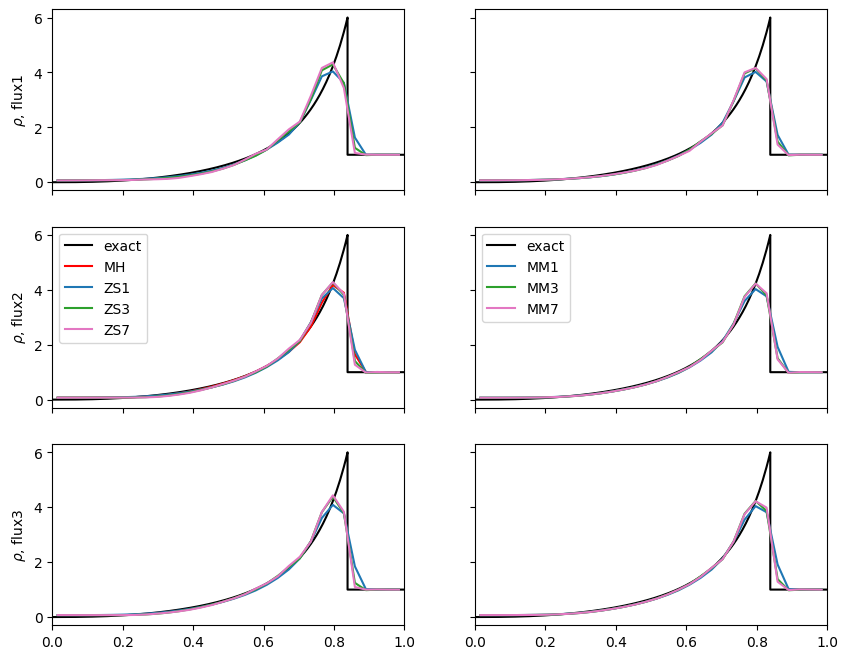

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 8))

axs[0, 0].set_ylabel(r"$\rho$, flux1")
axs[1, 0].set_ylabel(r"$\rho$, flux2")
axs[2, 0].set_ylabel(r"$\rho$, flux3")
axs[0, 0].set_xlim(0, 1)

N = 32
T = 0.8

# analytical solution
dim = 1
E0 = 1
rho0 = 1

r, d, u, P = sedovana(1.4, dim)

r *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (2 / (dim + 2))
d *= rho0
u *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (-dim / (dim + 2))
P *= (E0 / rho0) ** (2.0 / (dim + 2)) * T ** (-2 * dim / (dim + 2)) * rho0

for i, j in product(range(3), range(2)):
    axs[i, j].plot(r, d, label="exact", color="k")


# ic func
def ic(idx, x, y, z, t, *, xp):
    return sedov(idx, x, y, z, t, xp=xp, gamma=1.4, h=1 / N, P0=1e-5)


cmap = plt.get_cmap("tab10")


def color(x):
    return cmap(x - 1)


for i, flux_recipe in enumerate([1, 2, 3]):
    for p in [-1, 1, 3, 7]:
        if p == -1:
            if flux_recipe != 2:
                continue
            simMH = EulerSolver(
                ic=ic,
                bcx=("reflective", "free"),
                nx=N,
                p=1,
                riemann_solver="hllc",
                flux_recipe=flux_recipe,
                MUSCL=True,
                MUSCL_limiter="moncen",
                SED=True,
            )

            try:
                simMH.musclhancock(T)
            except Exception:
                continue

            plot_1d_slice(simMH, axs[i, 0], "rho", color="red", label="MH")
        else:
            simZS = EulerSolver(
                ic=ic,
                bcx=("reflective", "free"),
                nx=N,
                p=p,
                riemann_solver="hllc",
                flux_recipe=flux_recipe,
                ZS=True,
                SED=True,
                PAD={"rho": (0, None), "P": (0, None)},
            )

            simMOOD = EulerSolver(
                ic=ic,
                bcx=("reflective", "free"),
                nx=N,
                p=p,
                riemann_solver="hllc",
                flux_recipe=flux_recipe,
                MOOD=True,
                cascade="muscl",
                max_MOOD_iters=1,
                MUSCL_limiter="moncen",
                NAD=True,
                NAD_rtol=1e-2,
                NAD_atol=1e-7,
                SED=True,
                PAD={"rho": (0, None), "P": (0, None)},
            )

            try:
                simZS.run(T, q_max=2)
                simMOOD.run(T, q_max=2)
            except Exception:
                continue

            plot_1d_slice(simZS, axs[i, 0], "rho", color=color(p), label=f"ZS{p}")
            plot_1d_slice(simMOOD, axs[i, 1], "rho", color=color(p), label=f"MM{p}")

axs[1, 0].legend()
axs[1, 1].legend()